In [1]:
import requests
from bs4 import BeautifulSoup
import pandas
from nltk.tokenize import word_tokenize
import nltk
names=["Sheldon", "Leonard", "Howard", "Raj", "Penny"]

#### ¿Podemos predecir el personaje de una serie a partir de sus dialogos?

En este ejercicio vamos a hacer web scraping de dialogos de la Serie Big Bang Theory, nuestro objetivo sera entrenar un modelo que aprenda a distinguir entre los 5 personajes principales a partir de las palabras que utiliza.

In [2]:
url_principal="https://bigbangtrans.wordpress.com"



In [3]:
### get response
response = requests.get(url_principal)
soup = BeautifulSoup(response.text, "html.parser")
#Que obtengo?
print(response)
print(bool(response)) #Un boleano con se pudo acceder a la red 

<Response [200]>
True


## Obten una lista con las url de los 231 capitulos

In [4]:
soup.find("div", attrs={"class":"widget widget_pages"}).find_all("li")[134].find("a")['href']

'https://bigbangtrans.wordpress.com/series-06-episode-23-the-love-spell-potential/'

In [5]:
chapters=[]
for i in soup.find("div", class_="widget widget_pages").find_all("a"):
    chapters.append(i["href"])


In [6]:
len(chapters)

232

In [7]:
chapters[0]
# el primero no nos sirve

'https://bigbangtrans.wordpress.com/about/'

## Dada una url (un capitulo), haz una lista con todos los dialogos de ese capitulo

In [8]:
# aqui escogemos el primer capitulo
url=chapters[200]

In [9]:
url

'https://bigbangtrans.wordpress.com/series-9-episode-17-the-celebration-experimentation/'

In [10]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
entrytext = soup.find("div",attrs={'class':'entrytext'})

In [11]:
#entrytext.find_all("p")

In [12]:

text=[x.text for x in entrytext.find_all("p")]
len(text)

207

In [13]:
text[0]

'Scene: The stairwell'

In [14]:
dialogos=[]
for x in text:
    if x[0:5] != 'Scene':
        dialogos.append(x)

In [15]:
dialogos[20]

'Amy: Can you please just tell me why?'

## Reproduce esto para todos los capitulos, haz una lista donde cada elemento sea otra lista con los dialogos de cada capitulo

In [16]:
dialogos_capitulos = [] # cada elemento sera una lista con todos los parrafos/frases de cada capitulo
for i in range(1,len(chapters)):
    url=chapters[i]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    soup=soup.find("div",attrs={'class':'entrytext'})
    text=[x.text for x in soup.find_all("p")]
    dialogos=[]
    for x in text:
        if x[0:5] != 'Scene':
            dialogos.append(x)
    dialogos_capitulos.append(dialogos)

## Cojamos el primer capitulo, vamos a hacer 5 listas con las frases que ha dicho los 5 personajes. Cada lista tendrá todas las frases que dice cada personaje

In [17]:
Sheldon=[]
Leonard=[]
Howard=[]
Raj=[]
Penny=[]
dialogos = dialogos_capitulos[20]

### Para cada lista vamos a unir en una sola string todas las frases y lo pasaremos a minusculas

In [18]:
for x in dialogos:
    if x[0:7] == 'Sheldon':
        Sheldon.append(x[9:])
    if x[0:7] == 'Leonard':
        Leonard.append(x[9:])
    if x[0:6] == 'Howard':
        Howard.append(x[8:])
    if x[0:3] == 'Raj':
        Raj.append(x[5:])
    if x[0:5] == 'Penny':
        Penny.append(x[7:])

In [19]:
Penny=" ".join(Penny).lower()
Sheldon=" ".join(Sheldon).lower()
Leonard=" ".join(Leonard).lower()
Howard=" ".join(Howard).lower()
Raj=" ".join(Raj).lower()

## Pasa las 5 listas a un dataframe donde haya 2 columnas, el personaje y todas sus frases y sus frases
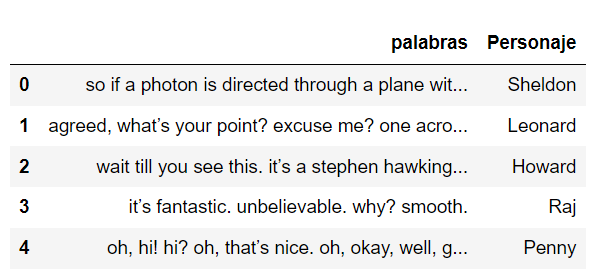

In [20]:
import pandas as pd
data = pd.DataFrame()
data['palabras']=[Sheldon,Leonard,Howard,Raj,Penny]
data['Personaje']=["Sheldon","Leonard","Howard","Raj","Penny"]

In [21]:
data

,palabras,Personaje
0,"entering, to penny who is in his spot): sit ov...",Sheldon
1,"let’s see, raj was the kung palo chicken. who ...",Leonard
2,"yes, you are. creepy good or creepy bad? that ...",Howard
3,"entering excitedly): hey guys, i just got the ...",Raj
4,"i’m the dumplings. creepy, howard. sit over th...",Penny


# Reproduce esto para todos los capitulos y junta todos los dataframes

In [22]:
lista_df=[]
for dialogos in dialogos_capitulos:
    Sheldon=[]
    Leonard=[]
    Howard=[]
    Raj=[]
    Penny=[]
    for x in dialogos:
        if x[0:7] == 'Sheldon':
            Sheldon.append(x[9:])
        if x[0:7] == 'Leonard':
            Leonard.append(x[9:])
        if x[0:6] == 'Howard':
            Howard.append(x[8:])
        if x[0:3] == 'Raj':
            Raj.append(x[5:])
        if x[0:5] == 'Penny':
            Penny.append(x[7:])
    Penny=" ".join(Penny).lower()
    Sheldon=" ".join(Sheldon).lower()
    Leonard=" ".join(Leonard).lower()
    Howard=" ".join(Howard).lower()
    Raj=" ".join(Raj).lower()
    data=pd.DataFrame()
    data['palabras']=[Sheldon,Leonard,Howard,Raj,Penny]
    data['Personaje']=["Sheldon","Leonard","Howard","Raj","Penny"]
    lista_df.append(data)

In [23]:
pd.concat(lista_df)

,palabras,Personaje
0,so if a photon is directed through a plane wit...,Sheldon
1,"agreed, what’s your point? excuse me? one acro...",Leonard
2,wait till you see this. it’s a stephen hawking...,Howard
3,it’s fantastic. unbelievable. why? smooth.,Raj
4,"oh, hi! hi? oh, that’s nice. oh, okay, well, g...",Penny
...,...,...
0,"how are you settling in? now, i’ve learned som...",Sheldon
1,"well, the last three nights i’ve had to take h...",Leonard
2,how’s sheldon doing with amy gone? if you’d li...,Howard
3,how are you doing with… it was a tutorial. and...,Raj


In [24]:
df_final=pd.concat(lista_df).reset_index(drop=True)

In [25]:
df_final

,palabras,Personaje
0,so if a photon is directed through a plane wit...,Sheldon
1,"agreed, what’s your point? excuse me? one acro...",Leonard
2,wait till you see this. it’s a stephen hawking...,Howard
3,it’s fantastic. unbelievable. why? smooth.,Raj
4,"oh, hi! hi? oh, that’s nice. oh, okay, well, g...",Penny
...,...,...
1150,"how are you settling in? now, i’ve learned som...",Sheldon
1151,"well, the last three nights i’ve had to take h...",Leonard
1152,how’s sheldon doing with amy gone? if you’d li...,Howard
1153,how are you doing with… it was a tutorial. and...,Raj


In [26]:
df_final.to_csv("bigbang.csv", index=False)

# Aplica los procesos NLP que has aprendido para hacer un modelo que distinga a los personajes

In [27]:
df_final[df_final.palabras.apply(len)>10]

,palabras,Personaje
0,so if a photon is directed through a plane wit...,Sheldon
1,"agreed, what’s your point? excuse me? one acro...",Leonard
2,wait till you see this. it’s a stephen hawking...,Howard
3,it’s fantastic. unbelievable. why? smooth.,Raj
4,"oh, hi! hi? oh, that’s nice. oh, okay, well, g...",Penny
...,...,...
1150,"how are you settling in? now, i’ve learned som...",Sheldon
1151,"well, the last three nights i’ve had to take h...",Leonard
1152,how’s sheldon doing with amy gone? if you’d li...,Howard
1153,how are you doing with… it was a tutorial. and...,Raj


In [28]:
df_final=df_final[df_final.palabras.apply(len)>10]

In [29]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')

def normalizar_y_stemmizar(titular):
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular = re.sub("[^a-zA-Z]"," ",str(titular))
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [word for word in titular if word not in stopwords]
    ## Hasta aqui Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    return titular

In [30]:
df_final.palabras=df_final.palabras.apply(normalizar_y_stemmizar)

C:\Users\garch\AppData\Local\Temp\ipykernel_6224\3317385534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.palabras=df_final.palabras.apply(normalizar_y_stemmizar)


In [48]:
df_final.to_csv("BBBNGTheory.csv")

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Usaremos solo las 500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=500

# Es decir que cada instancia tendrá 1000 features
cou_vec = TfidfVectorizer(max_features=max_features, max_df=0.9) # stop_words="english" , ngram_range=(1, 2)

In [33]:
matriz_titulos = cou_vec.fit_transform(df_final.palabras)

In [34]:
x = matriz_titulos.toarray()
y = df_final['Personaje']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,
                          max_depth=10,
                          max_samples=0.5,
                          min_samples_split=20,
                            min_samples_leaf=8)

In [36]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=500)

In [37]:
yhat = rf.predict(xtest)
yhat_train = rf.predict(xtrain)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,yhat_train)

0.8879216539717084

In [39]:
accuracy_score(ytest, yhat)

0.7043478260869566

In [40]:
yhat

array(['Howard', 'Leonard', 'Leonard', 'Raj', 'Sheldon', 'Raj', 'Leonard',
       'Howard', 'Sheldon', 'Raj', 'Sheldon', 'Leonard', 'Sheldon', 'Raj',
       'Raj', 'Penny', 'Raj', 'Howard', 'Raj', 'Sheldon', 'Howard',
       'Leonard', 'Raj', 'Howard', 'Howard', 'Howard', 'Penny', 'Penny',
       'Sheldon', 'Leonard', 'Leonard', 'Leonard', 'Leonard', 'Leonard',
       'Leonard', 'Penny', 'Leonard', 'Sheldon', 'Raj', 'Leonard',
       'Leonard', 'Penny', 'Raj', 'Sheldon', 'Penny', 'Leonard',
       'Sheldon', 'Howard', 'Penny', 'Raj', 'Howard', 'Leonard', 'Raj',
       'Penny', 'Sheldon', 'Sheldon', 'Leonard', 'Sheldon', 'Howard',
       'Leonard', 'Sheldon', 'Sheldon', 'Penny', 'Howard', 'Penny',
       'Howard', 'Leonard', 'Raj', 'Raj', 'Penny', 'Leonard', 'Leonard',
       'Penny', 'Raj', 'Sheldon', 'Raj', 'Sheldon', 'Howard', 'Sheldon',
       'Raj', 'Raj', 'Penny', 'Penny', 'Howard', 'Sheldon', 'Leonard',
       'Howard', 'Leonard', 'Raj', 'Leonard', 'Leonard', 'Raj', 'Sheldon',
  

In [41]:
rf.predict_proba(xtest)

array([[0.25604005, 0.20357471, 0.22115933, 0.20165773, 0.11756818],
       [0.23110822, 0.27701106, 0.20462381, 0.18917395, 0.09808296],
       [0.25944103, 0.2789602 , 0.154945  , 0.17178043, 0.13487334],
       ...,
       [0.20295264, 0.12945609, 0.19442361, 0.15300969, 0.32015797],
       [0.1462766 , 0.13306079, 0.13832509, 0.1357771 , 0.44656043],
       [0.2269106 , 0.19822609, 0.28542406, 0.20861875, 0.08082049]])

In [42]:
rf.classes_

array(['Howard', 'Leonard', 'Penny', 'Raj', 'Sheldon'], dtype=object)

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

def confusion(ytest,y_pred, modelo):
    names = modelo.classes_
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

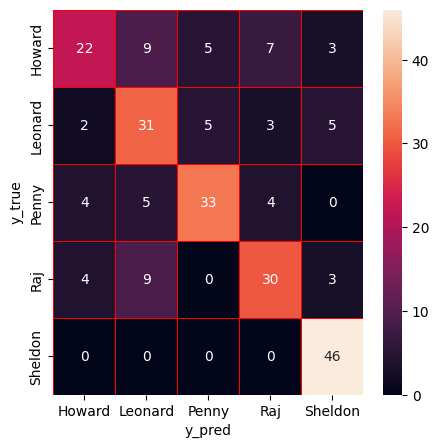

In [44]:
confusion(ytest,yhat, rf)